![Risk](img/Risk.png)

## Assignment 5 Risk

The program should simulate 1000 individual battle rounds in Risk (3 attackers vs 2 defender) and plot the result.

For extra marks: a more complicated version that simulates a full series of rounds for armies of arbitrary sizes, until one side is wiped out.

### Rules of Risk

In Risk one army fights another using 6 sided dice.

In each battle round, the attacker can put forward up to three of their troops (3 dice).

The defender can use up to two of their defending troops (2 dice).

Each side looses troops depending on the following rules:

1. The two top dice dice are compared (ie the attackers top dice roll with the defenders top dice roll).
    If the attackers dice is the same or lower they loose one troop otherwise the defender looses a troop (ie if the attackers dice is higher).
2. The next two highest dice from each side are then compared (ie the attackers second highest to the defenders second highest).
    If the attackers dice is the same or lower they loose one troop otherwise the defender looses a troop (ie if the attackers dice is higher).

Author: Irene Kilgannon

In [1]:
# Import modules
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd


from risk import *

In [2]:
plt.style.use('seaborn-v0_8')

A number of functions were created to simulate the game of Risk. These are in the risk.py module.

- roll_dice(num_dice)

    A function to simulate the rolling of any number of dice and return a sorted list of the values generated. For this [randint from the random module](https://www.geeksforgeeks.org/python-randint-function/) was used. The syntax is random.randint(start, end), where the start and end values are _included_. It is also possible to generate random numbers with [numpy's randint](https://numpy.org/doc/2.0/reference/random/generated/numpy.random.randint.html). It has a similar syntax np.random.randint(start, end) but with a significant difference. With numpy's randint function the end point is _excluded_.

    The lists were sorted with the [sorted function](https://www.w3schools.com/python/ref_func_sorted.asp). The default for this function is to sort lists in ascending order however using the reverse parameter, with reverse = True the list will be sorted in descending order. Sorting the lists in descending order is important as the dice values rolled for the attacker and defender are compared in descending order. 
    

- calculate_losses(attacker_dice, defender_dice)

    This function compares the dice values of the attacker and the defender for each round of the game. The top values in the attacker and defender lists are compared and then the second values in the lists are compared. 
    
    The [zip function](https://www.w3schools.com/python/ref_func_zip.asp) zips the attacker and defender lists together and returns a zip object. The zip object is an iterator of tuples, (a, d) and the values of the tuples are compared. For the game the losses for each round are tracked with the variables, round_attacker_losses and round_defender_losses. If the value of a in the attacker list is less than oo equal to the value of d in the defender list, round_attacker_losses will be increased by one. Otherwise the round_defender_losses is increased by one. As the attacker list will be longer than the defender list, the defender list will decide the list of the new iterator. As [w3schools](https://www.w3schools.com/python/ref_func_zip.asp) states "if the passed iterables have different lengths, the iterable with the least items decides the length of the new iterator". https://realpython.com/python-zip-function/
    
- simulate_battle(num_rounds)

    This functions simulates a battle. A counter will keep track of the overall losses for the attacker and the defender and round_scores which is a empty list is instantiated. Round_scores will contain a dictionary with the dice values rolled for the attacker and the defender and the score for each round. 

    The assignment tasks sets the number of rounds to 1000 but the function is designed that the number of rounds can be varied with the num_rounds argument. For each round roll_dice will create the rolled dice lists for the attacker, attacker_dice and defender, defender_dice. Calculate_losses takes these dice lists as an argument, compares the values and returns round_attacker_losses and round_defender_losses. These will be appended to round_scores along with the round number and attacker_dice and defender_dice. Simulate_battle adds the results of the calculate_losses function to the overall_losses counter for the attacker and defender. 

- plot_results(attacker_losses, defender_losses)

    Takes the values from the overall attacker_losses and defender_losses, prints the overall losses for both and creates a bar plot of the result. 
    
- score_frequency(rounds_score)

    The possible scores for the attacker losses vs defender losses are:
        Attacker Losses 2, Defender Losses 0
        Attacker Losses 1, Defender Losses 1
        Attacker Losses 0, Defender Losses 2
    This function will create a plot of the above based on the 'rounds_attacker_losses' column of the rounds_score dataframe.


This [realpython blog](https://realpython.com/python-return-statement/#returning-multiple-values) explains how to return multiple values from a function. Iterable unpacking allows access to the variables that are used or created by the function. To access the variables in the simulate_battle() they need to be unpacked.

In [3]:
# Simulate 1000 rounds of the battle
# Iterable unpack the return values of the simulate_battle function
attacker_dice, defender_dice, attacker_losses, defender_losses, round_scores = simulate_battle(1000)

The defender lost the battle.
 Attackers Losses: 927
 Defenders Losses: 1073


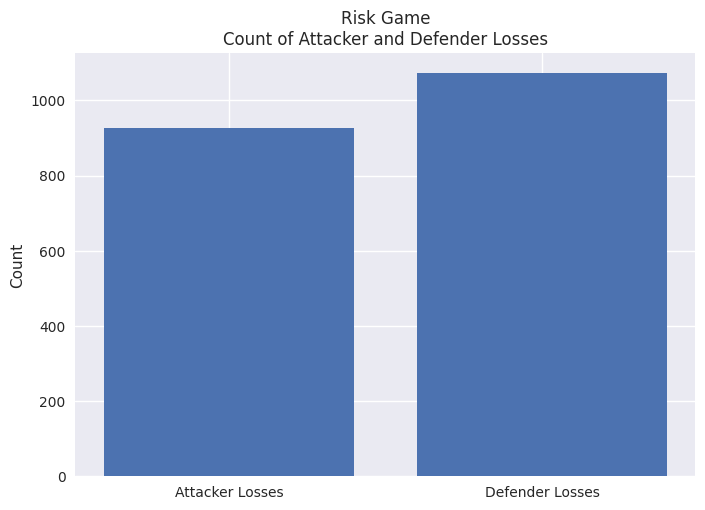

In [4]:
# Display the results after 1000 rounds of Risk.
plot_results(attacker_losses, defender_losses)

Converting the values in the rounds_scores list of dictionaries to a dataframe made it easier to check that the code functions as it should. It also makes it easier to plot the results of the battle.

In [5]:
# Convert round_scores to a dataframe
round_scores = pd.DataFrame(round_scores).set_index('round')
round_scores.head()

,attacker_dice,defender_dice,round_attacker_losses,round_defender_losses
round,,,,
1,"[5, 4, 3]","[6, 4]",2,0
2,"[6, 2, 1]","[5, 3]",1,1
3,"[2, 1, 1]","[4, 4]",2,0
4,"[5, 4, 2]","[6, 3]",1,1
5,"[6, 6, 1]","[6, 1]",1,1


round_attacker_losses
0    370
1    333
2    297
Name: count, dtype: int64


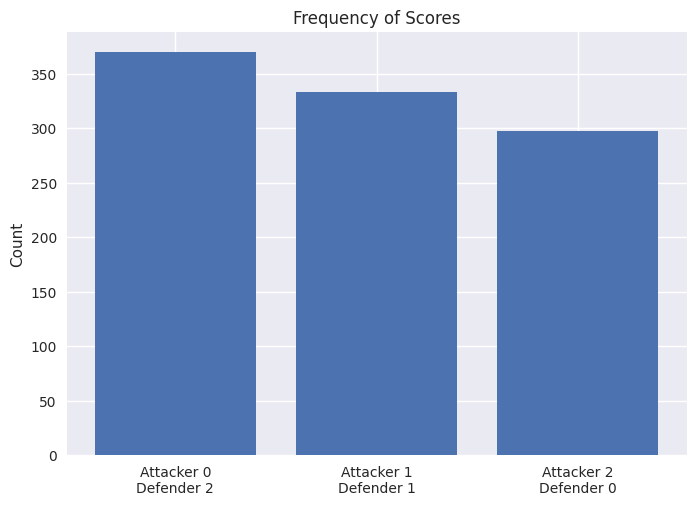

In [6]:
# Plot the frequency of possible scores
score_frequency(round_scores)

### Extra marks

A more complicated version that simulates a full series of rounds for armies of arbitrary sizes, until one side is wiped out.



Many of the functions same functions used for the simpler version of the game are required for this version such as roll_dice, plot_results() and score_frequency().
One new function was created, army_size(). The calculate_losses() and simulate_battle() functions were modified to take the army into account. 

- army_size()

    The size of the army was a decided by the random module. The army size could be any integer between 1 and 1000. At the start of the game the attacker and defender armies are the same size. 

- army_calculate_losses(attacker_dice, defender_dice, attacker_army_size, defender_army_size)

    This function is very similar to the calculate_losses function used for the simpler game. It differs in that it reduces the size of the loosing army by one every time it looses an individual battle in the dice comparison round. 

- army_simulate_battle(num_rounds)
    
    The number of rounds for the game is 1000 but the game could finish sooner if either the attacker or the defender has no army left. 


In [7]:
attacker_dice, defender_dice, attacker_losses, defender_losses, round_scores, attacker_army_size, defender_army_size = army_simulate_battle(1000)

The size of the attacker army  at start of game: 239
The size of the defender army at start of game: 239



The defender lost the battle.
 Attackers Losses: 186
 Defenders Losses: 239


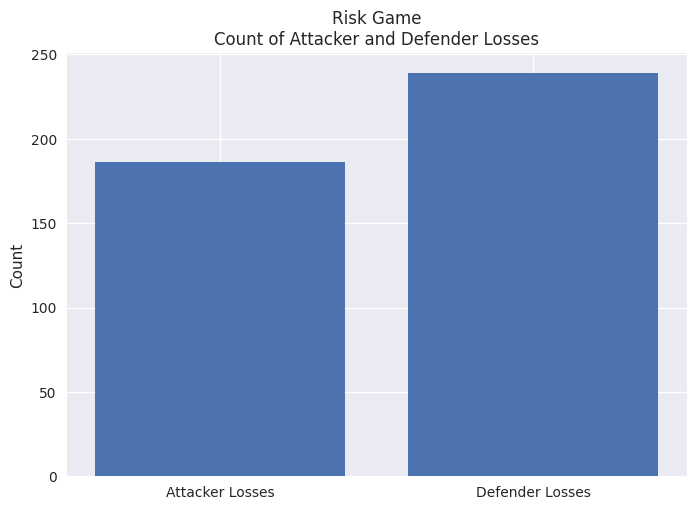

In [8]:
plot_results(attacker_losses, defender_losses)

In [9]:
round_scores = pd.DataFrame(round_scores).set_index('round')
round_scores.head()

,attacker_dice,defender_dice,round_attacker_losses,round_defender_losses,attacker_army_size,defender_army_size
round,,,,,,
1,"[6, 4, 3]","[2, 1]",0,2,239,237
2,"[5, 3, 1]","[3, 3]",1,1,238,236
3,"[5, 5, 4]","[5, 2]",1,1,237,235
4,"[6, 5, 3]","[2, 2]",0,2,237,233
5,"[4, 3, 1]","[6, 3]",2,0,235,233


round_attacker_losses
0    86
1    68
2    59
Name: count, dtype: int64


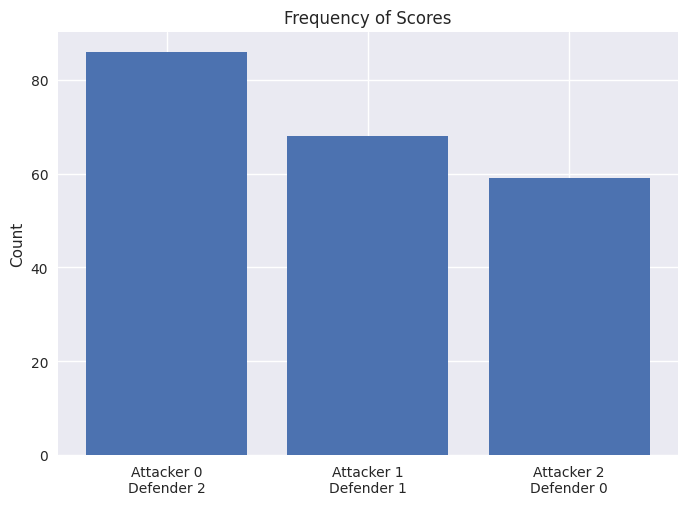

In [10]:
score_frequency(round_scores)

It took 213 rounds to complete the game.


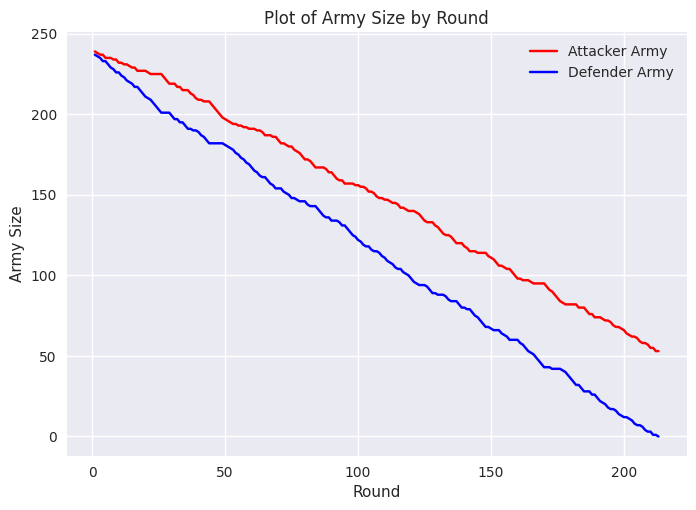

In [11]:
plot_army(round_scores)

__References__





 https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html

 Sort vs sorted https://www.w3schools.com/python/numpy/numpy_array_sort.asp Sort returns a copy leaving the original untouched.
 
 https://stackoverflow.com/questions/26984414/efficiently-sorting-a-numpy-array-in-descending-order

End 

***